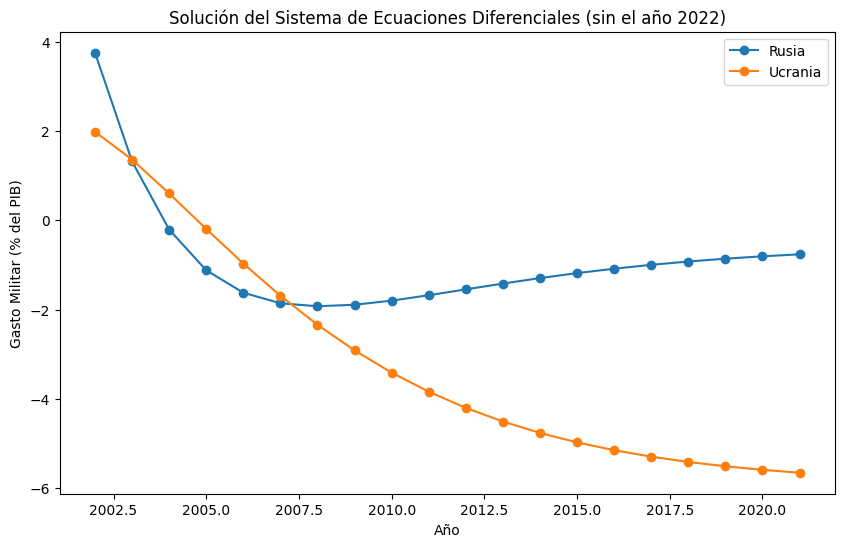

Rusia: x'(t) = -0.40966511827600943 * x + -0.15855457839551812 * y + -1.1673703267806774
Ucrania: y'(t) = 0.11464327883163296 * x - 0.12698056118337323 * y + -0.6889504974651529


In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Crear el DataFrame con los datos (sin el año 2022)
data = {
    "Año": [2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
    "Rusia": [3.756277391, 3.67083809, 3.300353647, 3.331237234, 3.246357234, 3.118542075, 3.14948602, 3.924063403, 
              3.58508572, 3.433043838, 3.689240435, 3.854042583, 4.112992978, 4.871514747, 5.425147705, 4.248996052, 
              3.71982244, 3.860337504, 4.171478901, 3.720451365],
    "Ucrania": [1.984684246, 2.124209046, 1.9670586, 2.405748995, 2.387745638, 2.472527403, 2.302741144, 1.908981904, 
                1.902361022, 1.533641241, 1.613319917, 1.579291679, 2.245020521, 3.251180763, 3.154776603, 2.884401519, 
                3.192353265, 3.520152416, 3.811849481, 3.228346937]
}

df = pd.DataFrame(data)

# Calcular la razón de cambio anual del gasto militar (diferencias)
df['Cambio_Rusia'] = df['Rusia'].diff()
df['Cambio_Ucrania'] = df['Ucrania'].diff()

# Realizar regresión lineal múltiple para ajustar el modelo de las ecuaciones diferenciales sin el 2022
X = df[['Rusia', 'Ucrania']]
y_rusia = df['Cambio_Rusia']
y_ucrania = df['Cambio_Ucrania']

# Modelo de regresión lineal múltiple para Rusia
model_rusia = LinearRegression().fit(X.iloc[1:], y_rusia[1:])
coef_rusia = model_rusia.coef_
intercept_rusia = model_rusia.intercept_

# Modelo de regresión lineal múltiple para Ucrania
model_ucrania = LinearRegression().fit(X.iloc[1:], y_ucrania[1:])
coef_ucrania = model_ucrania.coef_
intercept_ucrania = model_ucrania.intercept_

# Definir el sistema de ecuaciones diferenciales con los nuevos coeficientes
a, b = coef_rusia  # Coeficientes para Rusia
q, r = coef_ucrania  # Coeficientes para Ucrania
c = intercept_rusia  # Intercepto para Rusia
s = intercept_ucrania  # Intercepto para Ucrania

# Definir funciones diferenciales
f = lambda x, y, t: -a * x + b * y + c
g = lambda x, y, t: q * x - r * y + s

# Método de Runge-Kutta
def runge_kutta(f, g, x0, y0, a, b, h):
    t = np.arange(a, b + h, h)
    n = len(t)
    x = np.zeros(n) 
    y = np.zeros(n)
    x[0] = x0
    y[0] = y0
    for i in range(n - 1):
        k1 = h * f(x[i], y[i], t[i])
        l1 = h * g(x[i], y[i], t[i])
        k2 = h * f(x[i] + k1 / 2, y[i] + l1 / 2, t[i] + h / 2)
        l2 = h * g(x[i] + k1 / 2, y[i] + l1 / 2, t[i] + h / 2)
        k3 = h * f(x[i] + k2 / 2, y[i] + l2 / 2, t[i] + h / 2)
        l3 = h * g(x[i] + k2 / 2, y[i] + l2 / 2, t[i] + h / 2)
        k4 = h * f(x[i] + k3, y[i] + l3, t[i] + h)
        l4 = h * g(x[i] + k3, y[i] + l3, t[i] + h)
        x[i + 1] = x[i] + (1 / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
        y[i + 1] = y[i] + (1 / 6) * (l1 + 2 * l2 + 2 * l3 + l4)

    # Gráfica de las soluciones
    plt.figure(figsize=(10, 6))
    plt.plot(t, x, label='Rusia', marker='o', linestyle='-')
    plt.plot(t, y, label='Ucrania', marker='o', linestyle='-')
    plt.xlabel("Año")
    plt.ylabel("Gasto Militar (% del PIB)")
    plt.title("Solución del Sistema de Ecuaciones Diferenciales (sin el año 2022)")
    plt.legend()
    plt.show()

# Valores iniciales
xi = df['Rusia'].iloc[0]  # Primer valor en la columna 'Rusia'
yi = df['Ucrania'].iloc[0]  # Primer valor en la columna 'Ucrania'

# Ejecutar el método de Runge-Kutta con el intervalo de tiempo de 2002 a 2021
runge_kutta(f, g, xi, yi, 2002, 2021, 1)

# Imprimir los coeficientes para referencia
# Paso 4: Resolver el sistema de ecuaciones diferenciales (más adelante en el código)
print(f"Rusia: x'(t) = -{coef_rusia[0]} * x + {coef_rusia[1]} * y + {intercept_rusia}")
print(f"Ucrania: y'(t) = {coef_ucrania[0]} * x - {coef_ucrania[1]} * y + {intercept_ucrania}")
